# Лабораторная работа №1
---

## Цель - обучить и построить регрессионную по предсказанию цены за квартиру

## Постановка задач:

1. Провести разведочный анализ данных, обработать пропуски и дубликаты, выбросы и аномальные значения

2. Отобрать значимые признаки и оценить их влияние на предсказание цены, добавить новые признаки

3. Построить и обучить модель и оцень ее эффективность, определить самые значимые признаки которые влияют на стоимость квартиры


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!gdown 155r8lfPD6io_-CHEl6XMj1bcsu1Th4bG

Downloading...
From: https://drive.google.com/uc?id=155r8lfPD6io_-CHEl6XMj1bcsu1Th4bG
To: /content/data_lab_1.csv
100% 1.48M/1.48M [00:00<00:00, 11.6MB/s]


In [ ]:
data_path = "/content/data_lab_1.csv"

In [ ]:
data = pd.read_csv(data_path)
data.sample(5)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
4086,2990000.0,37.0,1,NaN,11.0,17.5,7,False,8.0,NaN,NaN,NaN,NaN,NaN
17985,2950000.0,59.0,2,2.5,5.0,29.7,4,False,8.3,NaN,NaN,NaN,NaN,NaN
7839,6400000.0,76.9,2,NaN,4.0,36.9,2,False,14.5,NaN,37860.0,11432.0,223.0,294.0
10030,1200000.0,32.0,1,NaN,5.0,17.0,1,False,NaN,NaN,NaN,NaN,NaN,NaN
3852,2500000.0,36.5,1,NaN,27.0,17.0,23,False,9.0,2.0,NaN,NaN,NaN,NaN


# 1 Предобработка данных

---
## Проверка соответсвия типов данных


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


Как будто все ок, максимум что я вижу признаки: ```floors_total, balcony``` можно перевести в `int`, но я это сделаю позже так как там есть `Nan`


## Обработка пропусков


<Axes: >

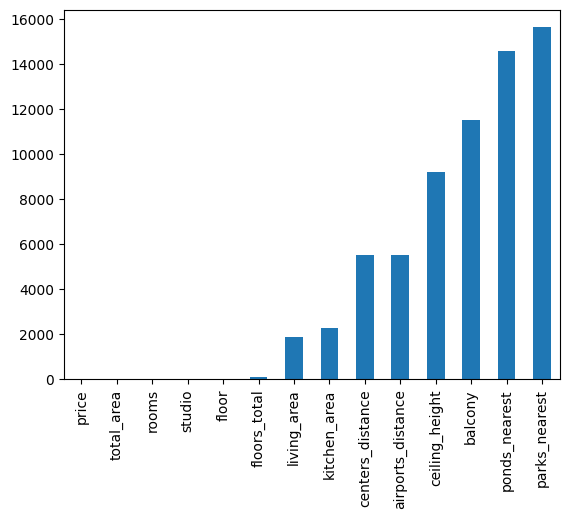

In [ ]:
data.isna().sum().sort_values().plot(kind="bar")

### Начнем по порядку floors_total

Заменять медианой/модой - не вариант, потому что есть столбец floor и вполне возможна ситуация total_floor: 5, floor: 33; что не очень хорошо, а пропусков не так много

In [ ]:
data.floors_total.isna().sum()

np.int64(86)

In [ ]:
data.dropna(inplace=True, subset=["floors_total"])


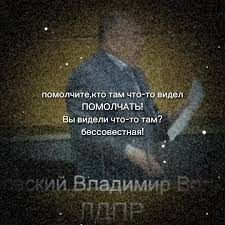

### living_area, kitchen area, balcony, ceiling Heght

Тут уже пропусков больше чем в `total_floors`. Буду подставлять среднее значение или медианну в зависимости от количества комнат, и потом разбираться с несовпадением площадей

#### Ноль комнат?

In [ ]:
data[data.rooms==0]

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
144,2450000.0,27.00,0,NaN,24.0,15.50,2,True,NaN,2.0,NaN,NaN,NaN,NaN
349,2320000.0,25.00,0,NaN,14.0,17.00,1,False,NaN,0.0,NaN,NaN,NaN,NaN
440,2480000.0,27.11,0,NaN,17.0,24.75,4,True,NaN,2.0,38171.0,15015.0,NaN,982.0
508,3375000.0,34.40,0,NaN,26.0,24.30,19,False,NaN,1.0,53115.0,19292.0,NaN,593.0
608,1850000.0,25.00,0,NaN,10.0,NaN,7,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,3200000.0,26.00,0,NaN,25.0,18.00,16,True,NaN,0.0,11405.0,13222.0,NaN,623.0
23442,2500000.0,27.70,0,NaN,24.0,18.00,4,False,NaN,2.0,NaN,NaN,NaN,NaN
23554,3350000.0,26.00,0,NaN,19.0,NaN,8,True,NaN,NaN,18090.0,17092.0,NaN,112.0
23592,1450000.0,29.00,0,NaN,9.0,18.00,8,False,NaN,2.0,NaN,NaN,NaN,NaN


Посмотрим на площади в этих квартирах и поставим комнатность следующим образом:

там где студия true - 1

< 40 м - 1

< 60 - 2

все остальное -3

In [ ]:
data.rooms = np.where((data.rooms ==0) & (data.studio == True), 1, data.rooms)

In [ ]:
data.rooms = np.where((data.rooms ==0) & (data.total_area <= 40), 1, data.rooms)
data[data.rooms == 0].shape

(2, 14)

In [ ]:
data.rooms = np.where((data.rooms ==0) & (data.total_area <= 60), 2, data.rooms)
data[data.rooms == 0].shape

(1, 14)

In [ ]:
data.rooms = np.where((data.rooms ==0), 3, data.rooms)
data[data.rooms == 0].shape

(0, 14)

In [ ]:
data[data.rooms == 0]

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest


### `Rooms` - удалим редкие и нерепрезентативные значения

Все что больше 6 имеет много пропусков и мало записей

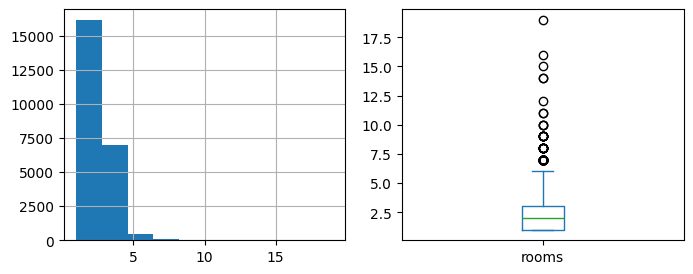

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.rooms.hist(ax=axes[0])
data.rooms.plot.box(ax=axes[1])

plt.show()

In [ ]:
Q1 = data.rooms.quantile(0.25)
Q3 = data.rooms.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3)
print(IQR)
print(upper_bound)

1.0 3.0
2.0
6.0


In [ ]:
data = data[data.rooms <= upper_bound]

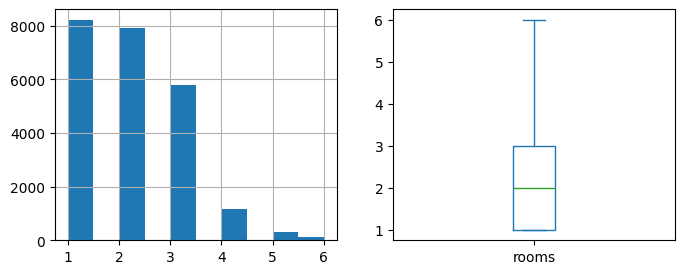

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.rooms.hist(ax=axes[0])
data.rooms.plot.box(ax=axes[1])

plt.show()

### Несовпадение площадей

Сумма жилой площади и площади кухни больше общей, таких всего 60 записей - удаляем

In [ ]:
data[data.kitchen_area + data.living_area > data.total_area].shape

(64, 14)

In [ ]:
data = data.drop(index=data[data.kitchen_area + data.living_area > data.total_area].index)

### Заполняем площади

In [ ]:
rooms = data.rooms.unique()
rooms.sort()
rooms

array([1, 2, 3, 4, 5, 6])

In [ ]:
room_to_living_area = {}
room_to_kitchen_area = {}
room_to_balcony = {}
room_to_ceiling = {}

for r in rooms:
  room_to_living_area[r] = round(data[data.rooms==r]["living_area"].mean(), 2)
  room_to_kitchen_area[r] = round(data[data.rooms==r]["kitchen_area"].mean(), 2)
  room_to_ceiling[r] = round(data[data.rooms==r]["ceiling_height"].mean(), 2)
  room_to_balcony[r] = np.int64(data[data.rooms==r]["balcony"].median())
display(room_to_living_area, room_to_kitchen_area, room_to_ceiling, room_to_balcony)

{np.int64(1): np.float64(17.87),
 np.int64(2): np.float64(31.69),
 np.int64(3): np.float64(47.36),
 np.int64(4): np.float64(66.94),
 np.int64(5): np.float64(100.01),
 np.int64(6): np.float64(131.8)}

{np.int64(1): np.float64(9.54),
 np.int64(2): np.float64(9.95),
 np.int64(3): np.float64(11.28),
 np.int64(4): np.float64(13.66),
 np.int64(5): np.float64(18.37),
 np.int64(6): np.float64(21.1)}

{np.int64(1): np.float64(2.72),
 np.int64(2): np.float64(2.75),
 np.int64(3): np.float64(2.77),
 np.int64(4): np.float64(2.93),
 np.int64(5): np.float64(3.17),
 np.int64(6): np.float64(3.26)}

{np.int64(1): np.int64(1),
 np.int64(2): np.int64(1),
 np.int64(3): np.int64(1),
 np.int64(4): np.int64(1),
 np.int64(5): np.int64(1),
 np.int64(6): np.int64(1)}

In [ ]:
display(data.living_area.isna().sum(), data.kitchen_area.isna().sum(), data.ceiling_height.isna().sum(), data.balcony.isna().sum())

np.int64(1863)

np.int64(2220)

np.int64(9071)

np.int64(11408)

#### Заполняем жилую площадь

In [ ]:
for r in rooms:
  data.loc[(data.living_area.isna()) & (data.rooms==r), "living_area"] = room_to_living_area[r]
  display(data.loc[(data.living_area.isna()) & (data.rooms==r)][["living_area"]].shape)
  print(f"Для квартир с {r} комнат заполнили {room_to_living_area[r]} жилой площади")

(0, 1)

Для квартир с 1 комнат заполнили 17.87 жилой площади


(0, 1)

Для квартир с 2 комнат заполнили 31.69 жилой площади


(0, 1)

Для квартир с 3 комнат заполнили 47.36 жилой площади


(0, 1)

Для квартир с 4 комнат заполнили 66.94 жилой площади


(0, 1)

Для квартир с 5 комнат заполнили 100.01 жилой площади


(0, 1)

Для квартир с 6 комнат заполнили 131.8 жилой площади


#### Заполняем площадь кухни

In [ ]:
for r in rooms:
  data.loc[(data.kitchen_area.isna()) & (data.rooms==r), "kitchen_area"] = room_to_kitchen_area[r]
  display(data.loc[(data.kitchen_area.isna()) & (data.rooms==r)][["kitchen_area"]].shape)
  print(f"Для квартир с {r} комнат заполнили {room_to_kitchen_area[r]} кухонной площади")

(0, 1)

Для квартир с 1 комнат заполнили 9.54 кухонной площади


(0, 1)

Для квартир с 2 комнат заполнили 9.95 кухонной площади


(0, 1)

Для квартир с 3 комнат заполнили 11.28 кухонной площади


(0, 1)

Для квартир с 4 комнат заполнили 13.66 кухонной площади


(0, 1)

Для квартир с 5 комнат заполнили 18.37 кухонной площади


(0, 1)

Для квартир с 6 комнат заполнили 21.1 кухонной площади


In [ ]:
data[data.kitchen_area + data.living_area > data.total_area]

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
164,800000.0,40.3,2,NaN,3.0,31.69,1,False,9.95,2.0,NaN,NaN,NaN,NaN
227,2200000.0,47.0,3,2.34,5.0,47.36,1,False,11.28,NaN,NaN,NaN,NaN,NaN
322,2000000.0,25.0,1,NaN,5.0,17.87,5,False,9.54,0.0,NaN,NaN,NaN,NaN
349,2320000.0,25.0,1,NaN,14.0,17.00,1,False,9.54,0.0,NaN,NaN,NaN,NaN
392,3900000.0,41.3,2,2.55,5.0,31.69,3,False,9.95,NaN,40806.0,11738.0,488.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,3200000.0,26.0,1,NaN,25.0,18.00,16,True,9.54,0.0,11405.0,13222.0,NaN,623.0
23554,3350000.0,26.0,1,NaN,19.0,17.87,8,True,9.54,NaN,18090.0,17092.0,NaN,112.0
23579,2350000.0,24.8,1,NaN,10.0,18.00,2,False,9.54,NaN,NaN,NaN,NaN,NaN
23613,3950000.0,52.0,3,NaN,5.0,47.36,2,False,11.28,NaN,55549.0,21223.0,NaN,NaN


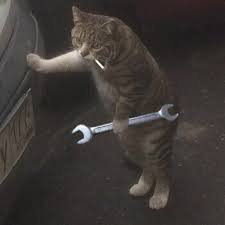

Уменьшим жилую площадь на величину превышения общей площади

In [ ]:
data.loc[data.kitchen_area + data.living_area > data.total_area, "living_area"] = np.floor(data.total_area - data.kitchen_area)

#### Заполняем высоту потолков

In [ ]:
for r in rooms:
  data.loc[(data.ceiling_height.isna()) & (data.rooms==r), "ceiling_height"] = room_to_ceiling[r]
  display(data.loc[(data.ceiling_height.isna()) & (data.rooms==r)][["ceiling_height"]].shape)
  print(f"Для квартир с {r} комнат заполнили {room_to_ceiling[r]} высоты потолков")

(0, 1)

Для квартир с 1 комнат заполнили 2.72 высоты потолков


(0, 1)

Для квартир с 2 комнат заполнили 2.75 высоты потолков


(0, 1)

Для квартир с 3 комнат заполнили 2.77 высоты потолков


(0, 1)

Для квартир с 4 комнат заполнили 2.93 высоты потолков


(0, 1)

Для квартир с 5 комнат заполнили 3.17 высоты потолков


(0, 1)

Для квартир с 6 комнат заполнили 3.26 высоты потолков


#### Заполняем балконы

In [ ]:
for r in rooms:
  data.loc[(data.balcony.isna()) & (data.rooms==r), "balcony"] = room_to_balcony[r]
  display(data.loc[(data.balcony.isna()) & (data.rooms==r)][["balcony"]].shape)
  print(f"Для квартир с {r} комнат заполнили {room_to_balcony[r]} количество балконов")

(0, 1)

Для квартир с 1 комнат заполнили 1 количество балконов


(0, 1)

Для квартир с 2 комнат заполнили 1 количество балконов


(0, 1)

Для квартир с 3 комнат заполнили 1 количество балконов


(0, 1)

Для квартир с 4 комнат заполнили 1 количество балконов


(0, 1)

Для квартир с 5 комнат заполнили 1 количество балконов


(0, 1)

Для квартир с 6 комнат заполнили 1 количество балконов


### centers_distance, airports_distance, parks_nearest, ponds_nearest

Эти признаки имеет много пропусков, я их переведу в категориальные: рядом пруд/центр/фэропорт/парк, а там где пропуски укажу False

<Axes: >

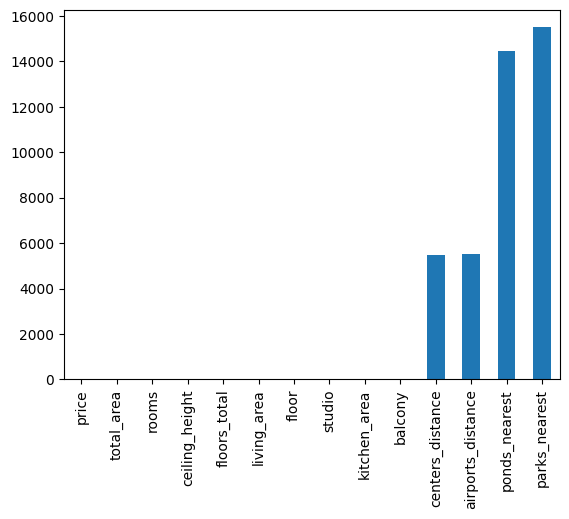

In [ ]:
data.isna().sum().sort_values().plot(kind="bar")

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,23459.0,6.371698e+06,8.773763e+06,12190.0,3400000.0,4600000.00,6730300.00,401300000.0
total_area,23459.0,5.953315e+01,3.202092e+01,12.0,40.0,52.00,69.20,507.0
rooms,23459.0,2.057718e+00,9.940536e-01,1.0,1.0,2.00,3.00,6.0
ceiling_height,23459.0,2.761991e+00,9.655511e-01,1.0,2.6,2.72,2.77,100.0
floors_total,23459.0,1.068660e+01,6.595954e+00,1.0,5.0,9.00,16.00,60.0
living_area,23459.0,3.380288e+01,1.964818e+01,2.0,18.2,30.10,42.30,301.5
floor,23459.0,5.877829e+00,4.873661e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,23459.0,1.048858e+01,5.484805e+00,1.3,7.3,9.54,11.50,107.0
balcony,23459.0,1.079159e+00,7.711549e-01,0.0,1.0,1.00,1.00,5.0
airports_distance,17950.0,2.880966e+04,1.264556e+04,0.0,18551.0,26770.50,37288.00,84869.0


---
## Обработка аномальных значений и выбросов

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,23459.0,6.371698e+06,8.773763e+06,12190.0,3400000.0,4600000.00,6730300.00,401300000.0
total_area,23459.0,5.953315e+01,3.202092e+01,12.0,40.0,52.00,69.20,507.0
rooms,23459.0,2.057718e+00,9.940536e-01,1.0,1.0,2.00,3.00,6.0
ceiling_height,23459.0,2.761991e+00,9.655511e-01,1.0,2.6,2.72,2.77,100.0
floors_total,23459.0,1.068660e+01,6.595954e+00,1.0,5.0,9.00,16.00,60.0
living_area,23459.0,3.380288e+01,1.964818e+01,2.0,18.2,30.10,42.30,301.5
floor,23459.0,5.877829e+00,4.873661e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,23459.0,1.048858e+01,5.484805e+00,1.3,7.3,9.54,11.50,107.0
balcony,23459.0,1.079159e+00,7.711549e-01,0.0,1.0,1.00,1.00,5.0
airports_distance,17950.0,2.880966e+04,1.264556e+04,0.0,18551.0,26770.50,37288.00,84869.0


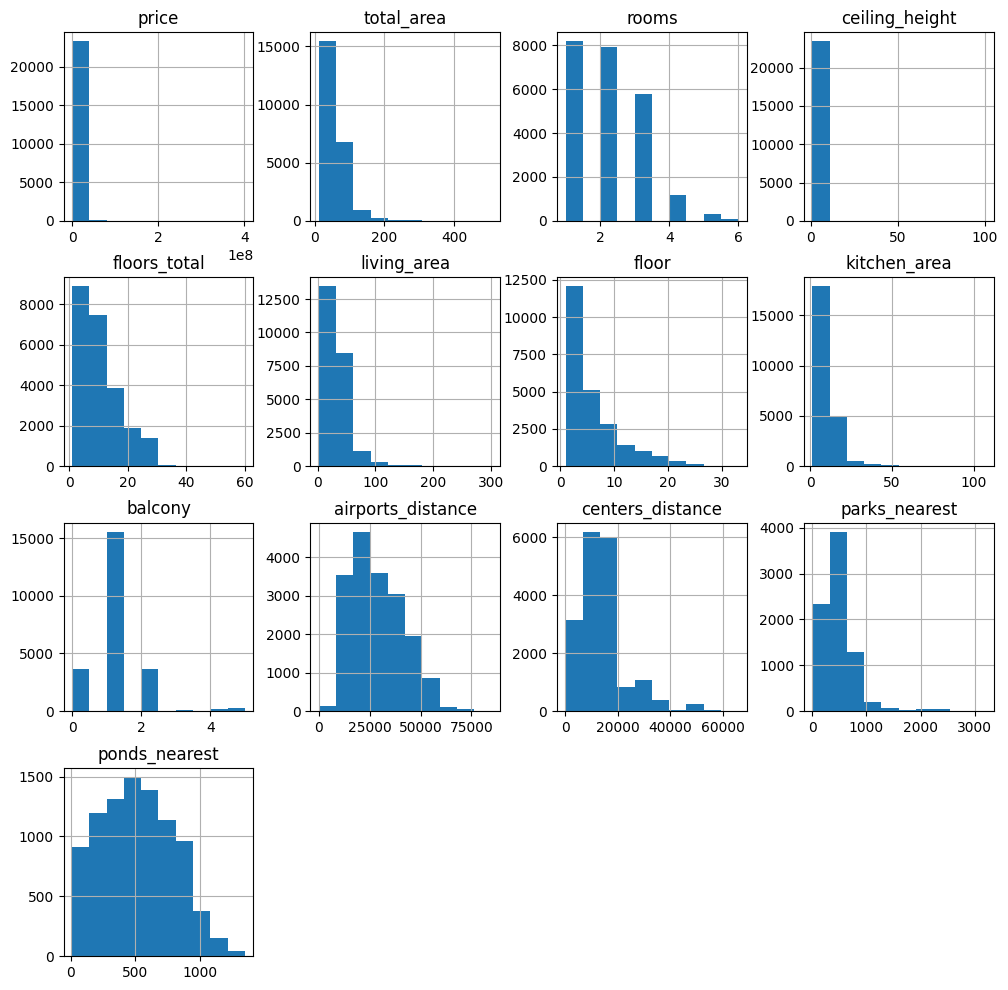

In [ ]:
data.hist(figsize=(12, 12))
plt.show()

---
### Цена

Есть два момента:

Первый цена очень высокая - 763 млн., но квартиры и правда продаются по [миллиарду](https://spb.cian.ru/cat.php?currency=2&deal_type=sale&engine_version=2&minprice=900000000&offer_type=flat&region=2)

Второй квартира за 12к, посмотрим сколько таких и взглянем на них


In [ ]:
data[data.price < 2000000].sort_values("price")

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
8793,12190.0,109.0,2,2.75,25.0,32.00,25,False,40.50,1.0,36421.0,9176.0,805.0,NaN
14911,430000.0,54.0,2,2.75,3.0,31.69,3,False,9.95,1.0,NaN,NaN,NaN,NaN
17456,430000.0,30.4,1,2.72,2.0,16.00,1,False,6.00,1.0,NaN,NaN,NaN,NaN
16274,440000.0,40.0,1,2.72,5.0,17.87,1,False,9.54,1.0,NaN,NaN,NaN,NaN
9581,450000.0,43.4,2,2.75,5.0,30.30,3,False,5.50,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20818,1999000.0,28.4,1,2.72,5.0,17.10,4,False,5.50,1.0,NaN,NaN,NaN,NaN
2052,1999000.0,34.6,1,2.50,5.0,17.00,4,False,8.00,2.0,NaN,NaN,NaN,NaN
10489,1999000.0,41.0,1,2.72,14.0,17.60,3,False,12.00,0.0,NaN,NaN,NaN,NaN
21910,1999000.0,37.0,1,2.72,3.0,16.00,2,False,8.70,1.0,NaN,NaN,NaN,NaN


Квартира за 12к всего одна; 12к это явно бред 100 квадратов, 9 км до центра и рядом парк - удаляем

Однако дальше смущают квартиры за 400к и вообще меньше 2 млн.

Посмотрим на распределение цен

In [ ]:
data = data.drop(index=data[data.price == 12190].index)

<Axes: >

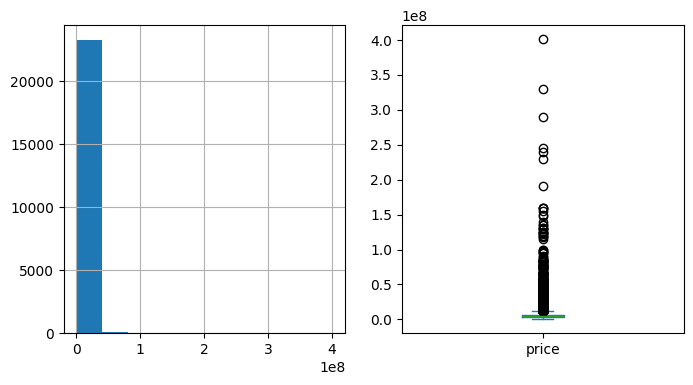

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
data.price.hist(ax=axes[0])
data.price.plot.box(ax=axes[1])

Основная часть цен лежит в пределах 150 млн.; выбросы удаляем методом межквартильных расстояний.

In [ ]:
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = max(0, Q1 - 1.5 * IQR)
print(Q1, Q3)
print(IQR)
print(upper_bound, lower_bound)

3400000.0 6732950.0
3332950.0
11732375.0 0


In [ ]:
data[(data["price"] >= upper_bound) | (data["price"] <= lower_bound)].shape

(1990, 14)

In [ ]:
data = data[(data["price"] <= upper_bound) & (data["price"] >= lower_bound)]

<Axes: >

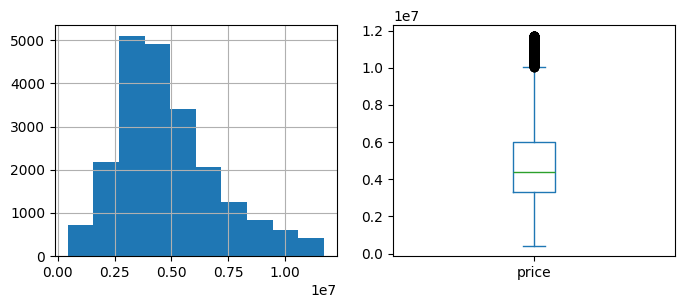

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.price.hist(ax=axes[0])
data.price.plot.box(ax=axes[1])

UPD: при удалении квартир меньше 1 млн., падает качество модели, поэтому я их оставил

Возможно это доли в квартирах или отдельные комнаты в комуналках

In [ ]:
data.shape

(21468, 14)

### `Total Area`

<Axes: >

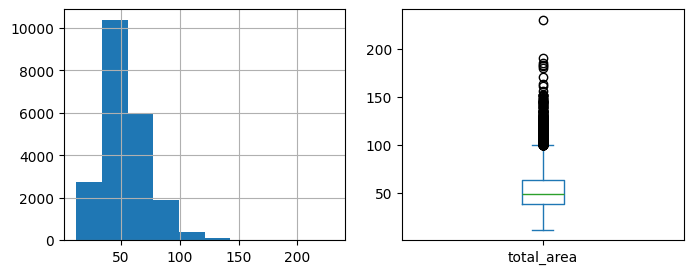

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.total_area.hist(ax=axes[0])
data.total_area.plot.box(ax=axes[1])

In [ ]:
Q1 = data.total_area.quantile(0.25)
Q3 = data.total_area.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = max(0, Q1 - 1.5 * IQR)
print(Q1, Q3)
print(IQR)
print(upper_bound, lower_bound)

39.0 63.3
24.299999999999997
99.75 2.5500000000000043


In [ ]:
data[(data.total_area >= upper_bound)].shape

(478, 14)

In [ ]:
data = data[(data.total_area <= upper_bound)]

<Axes: >

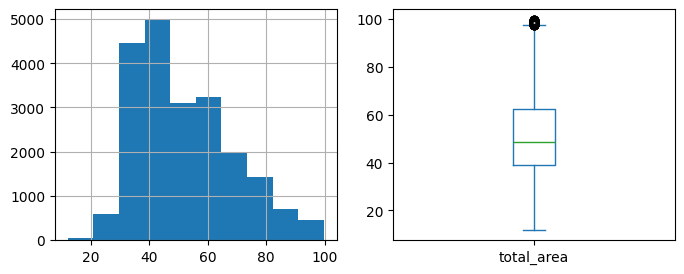

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.total_area.hist(ax=axes[0])
data.total_area.plot.box(ax=axes[1])

In [ ]:
data.shape

(20990, 14)

### Высота потолков

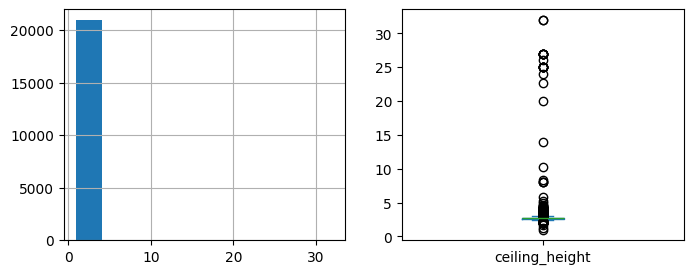

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.ceiling_height.hist(ax=axes[0])
data.ceiling_height.plot.box(ax=axes[1])

plt.show()

In [ ]:
data.shape

(20990, 14)

Я нашел ограничение по [высоте > 2.5](https://docs.cntd.ru/document/5200164) и не нашел квартиры с потолками выше чем [5 м](https://spb.cian.ru/sale/flat/320557834/)


In [ ]:
data = data.drop(index=data.loc[(data.ceiling_height > 5) | (data.ceiling_height < 2.5)].index)

In [ ]:
Q1 = data.ceiling_height.quantile(0.25)
Q3 = data.ceiling_height.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3)
print(IQR)
print(upper_bound)

2.6 2.75
0.1499999999999999
2.9749999999999996


In [ ]:
data = data[data.ceiling_height <= upper_bound]

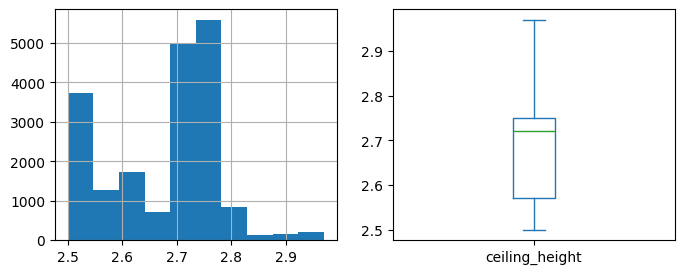

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.ceiling_height.hist(ax=axes[0])
data.ceiling_height.plot.box(ax=axes[1])

plt.show()

In [ ]:
data.shape

(19364, 14)

### Этажи

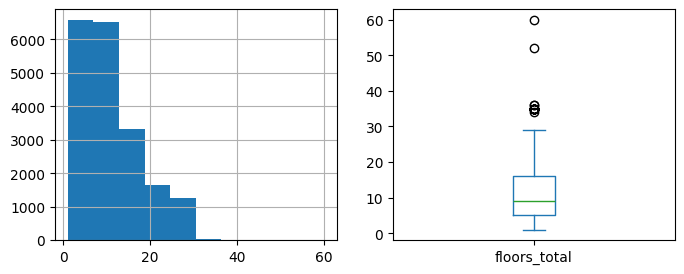

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.floors_total.hist(ax=axes[0])
data.floors_total.plot.box(ax=axes[1])

plt.show()

In [ ]:
Q1 = data.floors_total.quantile(0.25)
Q3 = data.floors_total.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3)
print(IQR)
print(upper_bound)

5.0 16.0
11.0
32.5


In [ ]:
data = data[data.floors_total <= upper_bound]

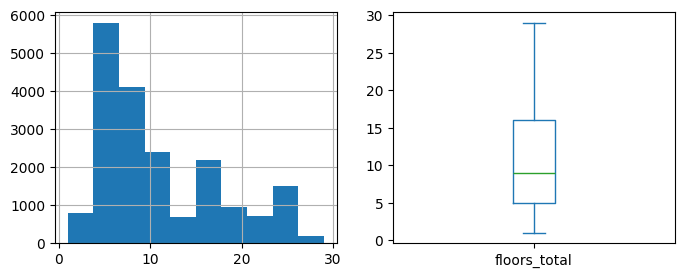

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.floors_total.hist(ax=axes[0])
data.floors_total.plot.box(ax=axes[1])

plt.show()

In [ ]:
data.shape

(19338, 14)

### `Living_area`

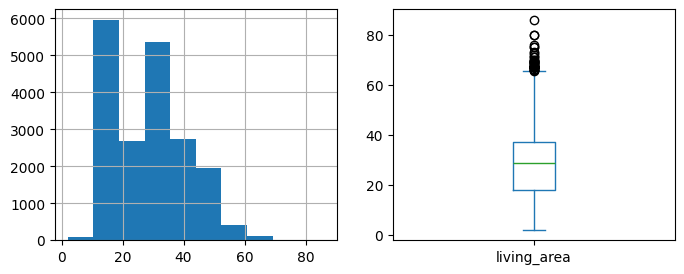

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.living_area.hist(ax=axes[0])
data.living_area.plot.box(ax=axes[1])

plt.show()

In [ ]:
Q1 = data.living_area.quantile(0.25)
Q3 = data.living_area.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3)
print(IQR)
print(upper_bound)

18.0 37.0
19.0
65.5


In [ ]:
data = data[data.living_area <= upper_bound]

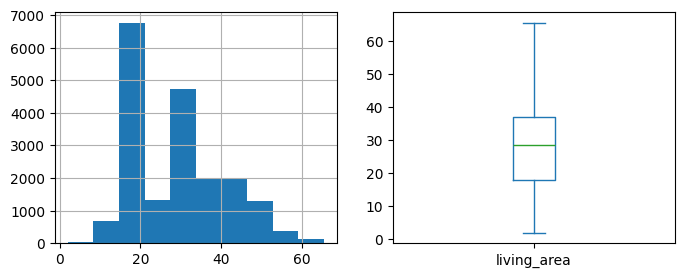

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.living_area.hist(ax=axes[0])
data.living_area.plot.box(ax=axes[1])

plt.show()

In [ ]:
data.shape

(19285, 14)

### `Kitchen_area`

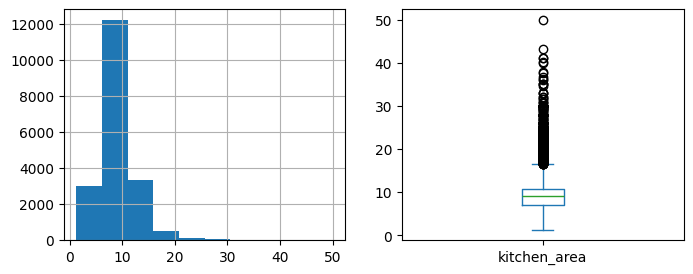

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
data.kitchen_area.hist(ax=axes[0])
data.kitchen_area.plot.box(ax=axes[1])

plt.show()

In [ ]:
Q1 = data.kitchen_area.quantile(0.25)
Q3 = data.kitchen_area.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3)
print(IQR)
print(upper_bound)

7.0 10.8
3.8000000000000007
16.5


In [ ]:
data = data[data.kitchen_area <= upper_bound]

In [ ]:
data.shape

(18697, 14)

### Итоговые распределения

Видно, что много признаков имеют хвосты справа

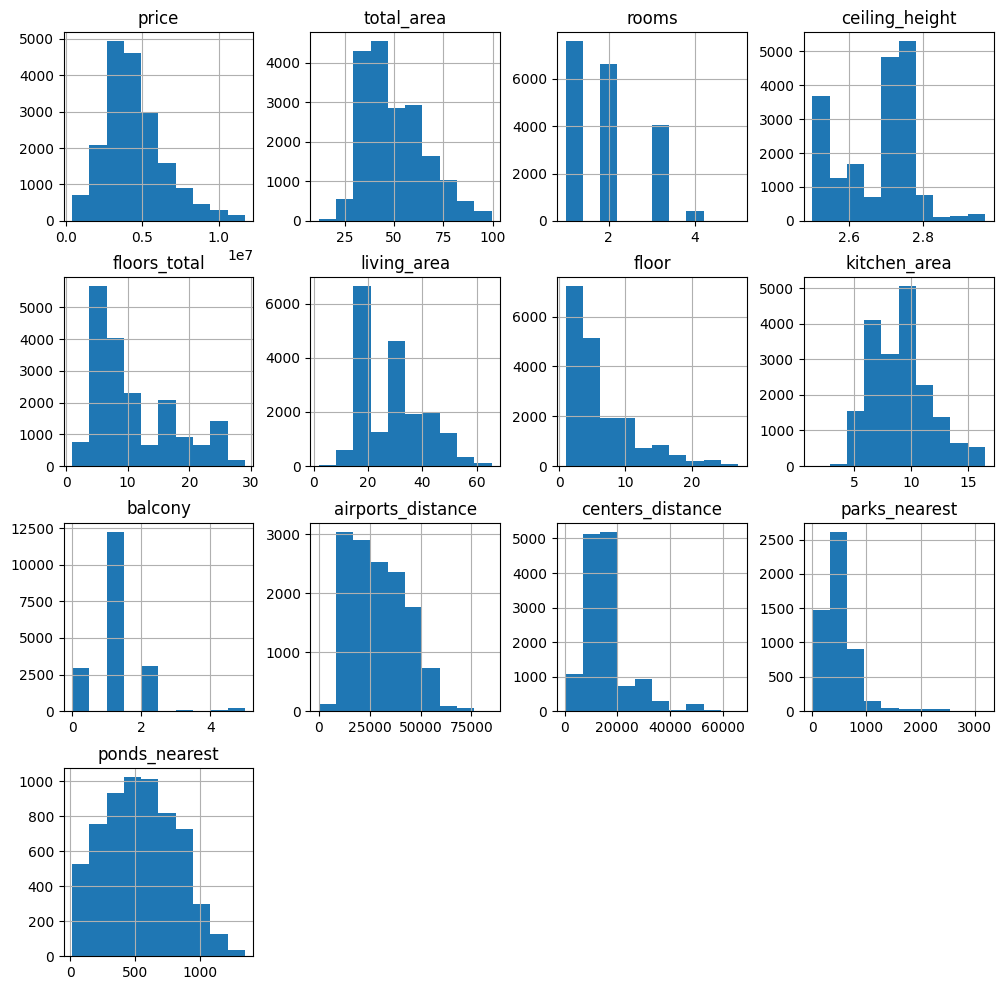

In [ ]:
data.hist(figsize=(12, 12))
plt.show()

## Обработка дубликатов

In [ ]:
data = data.drop_duplicates()

# 2 Создание новых признаков

`price_per_metr` - нет смысла делать, так как у меня целевой признак `price` и его не будет известно, но если знать `price_per_metr`, то модель будет давать очень точные значения

`floor_coef` этаж и общее количество этажей сильно коррелируют, чтобы показать относительность этажа введен коэфицент

In [ ]:
data["floor_coef"] = data.floor / data.floors_total

`is_balcony` Вместо количества балконов будем смотреть на его наличие

In [ ]:
data["is_balcony"] = data.balcony > 0

`is_f/l_floor` На первых и последних этажах, насколько мне изветно, квартиры чуть дешевле

In [ ]:
data["is_first_floor"] = data.floor == 1

In [ ]:
data["is_last_floor"] = (data.floor == data.floors_total)

`is_*_near` Данные имеют много пропусков ну и сами расстояния мало о чем говорят, а нам важно лишь наличие того или иного объекта рядом

In [ ]:
data["is_park_near"] = data.parks_nearest < 3000
data["is_airport_near"] = data.airports_distance < 3000
data["is_center_near"] = data.centers_distance < 3000
data["is_pond_near"] = data.ponds_nearest < 3000

`is_n_room` Комнаты и общая площадь сильно коррелируют, но комнаты передают планирвоку, а площадь нет

In [ ]:
data["is_one_room"] = np.where(data.rooms == 1, True, False)
data["is_two_room"] = np.where(data.rooms == 2, True, False)
data["is_three_room"] = np.where(data.rooms == 3, True, False)
data["is_apartaments"] = np.where(data.rooms > 3, True, False)

In [ ]:
data[["floors_total", "balcony"]] = data[["floors_total", "balcony"]].astype(np.int64)

In [ ]:
data = data.reset_index().drop("index", axis=1)

In [ ]:
data.sample(5)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,...,is_first_floor,is_last_floor,is_park_near,is_airport_near,is_center_near,is_pond_near,is_one_room,is_two_room,is_three_room,is_apartaments
18579,3200000.0,49.1,2,2.75,8,29.0,3,False,8.0,1,...,False,False,False,False,False,False,False,True,False,False
4563,6200000.0,61.6,3,2.50,9,39.0,3,False,8.0,1,...,False,False,False,False,False,True,False,False,True,False
9218,10650000.0,75.0,2,2.80,25,40.0,4,False,15.0,1,...,False,False,False,False,False,True,False,True,False,False
1513,2899000.0,48.0,1,2.72,9,19.0,9,False,10.0,2,...,False,True,False,False,False,False,True,False,False,False
6188,1670000.0,48.0,2,2.75,5,27.0,5,False,8.0,1,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,18696.0,4.489673e+06,1.939864e+06,430000.000000,3.200000e+06,4.200000e+06,5500000.00,11700000.00
total_area,18696.0,5.023179e+01,1.565415e+01,12.000000,3.800000e+01,4.640000e+01,60.10,99.40
rooms,18696.0,1.858633e+00,8.363680e-01,1.000000,1.000000e+00,2.000000e+00,2.00,5.00
ceiling_height,18696.0,2.669105e+00,1.077616e-01,2.500000,2.560000e+00,2.720000e+00,2.75,2.97
floors_total,18696.0,1.102594e+01,6.570263e+00,1.000000,5.000000e+00,9.000000e+00,16.00,29.00
living_area,18696.0,2.878933e+01,1.144746e+01,2.000000,1.800000e+01,2.850000e+01,37.00,65.40
floor,18696.0,6.002033e+00,4.923300e+00,1.000000,2.000000e+00,5.000000e+00,8.00,27.00
kitchen_area,18696.0,9.028054e+00,2.533914e+00,1.300000,7.000000e+00,9.000000e+00,10.50,16.50
balcony,18696.0,1.074080e+00,7.433542e-01,0.000000,1.000000e+00,1.000000e+00,1.00,5.00
airports_distance,13618.0,2.920168e+04,1.330525e+04,0.000000,1.760100e+04,2.790900e+04,39046.00,84869.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18696 entries, 0 to 18695
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              18696 non-null  float64
 1   total_area         18696 non-null  float64
 2   rooms              18696 non-null  int64  
 3   ceiling_height     18696 non-null  float64
 4   floors_total       18696 non-null  int64  
 5   living_area        18696 non-null  float64
 6   floor              18696 non-null  int64  
 7   studio             18696 non-null  bool   
 8   kitchen_area       18696 non-null  float64
 9   balcony            18696 non-null  int64  
 10  airports_distance  13618 non-null  float64
 11  centers_distance   13629 non-null  float64
 12  parks_nearest      5270 non-null   float64
 13  ponds_nearest      6257 non-null   float64
 14  floor_coef         18696 non-null  float64
 15  is_balcony         18696 non-null  bool   
 16  is_first_floor     186

# 3 Отбор значимых признаков

In [ ]:
num_columns = data.select_dtypes([np.number]).columns
cat_columns = list(set(data.columns) - set(num_columns))

<Axes: >

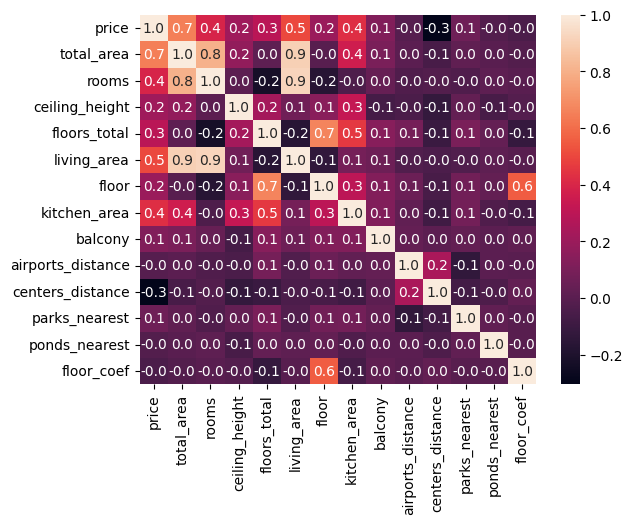

In [ ]:
sns.heatmap(data[num_columns].corr(), annot=True, fmt=".1f")

Сто процентов удаляем все дистанции и количество балконов, так как их перевели в категориальные признаки. Тякже удаляем признаки которые сильно коррелируют между собой, но не с целевой переменной

In [ ]:
col_to_delete = [
    "living_area", # Сильная корреляция с total_area и rooms
    "floor", # Коррелирует с floors_total введена замена floor_coef
    "balcony", # Переведены в категориальный ↓
    "rooms",
    "airports_distance",
    "centers_distance",
    "parks_nearest",
    "ponds_nearest",
    ]

In [ ]:
clear_data = data.drop(col_to_delete, axis=1)

<Axes: >

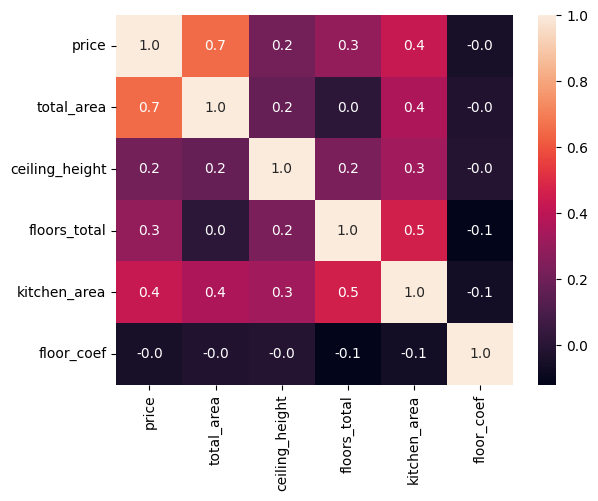

In [ ]:
sns.heatmap(clear_data.select_dtypes(np.number).corr(), annot=True, fmt=".1f")

# 4 Выделение различных групп квартир, внутри которых влияние характеристик на цену различаются между группами

### Студия и не студия

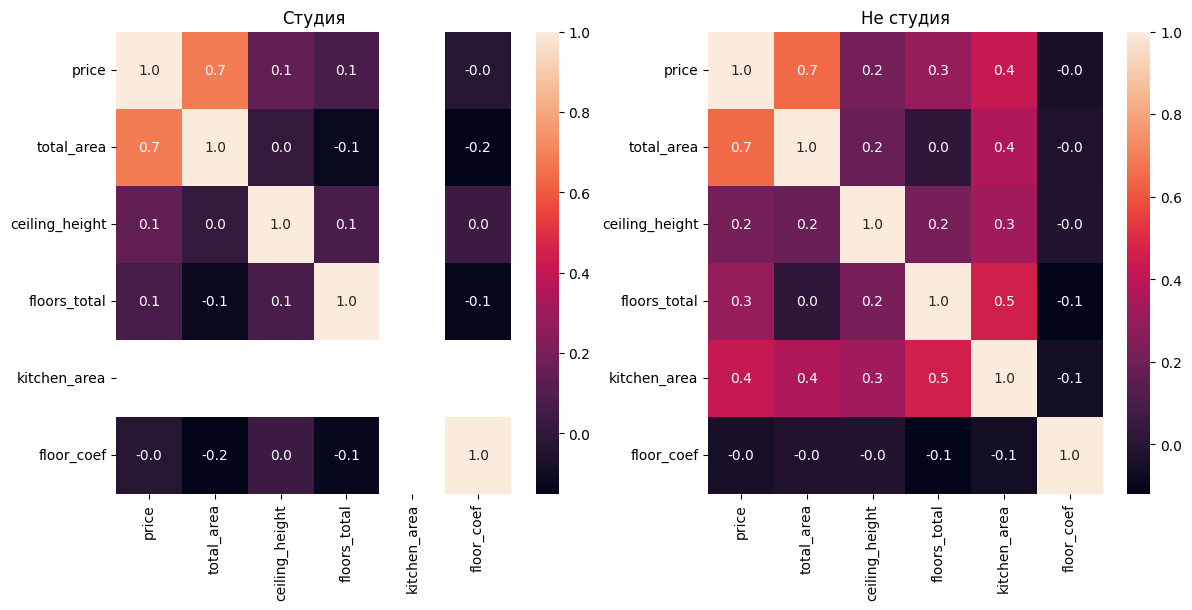

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(clear_data[clear_data.studio == True].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[0]).set_title("Студия")
sns.heatmap(clear_data[clear_data.studio == False].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[1]).set_title("Не студия")

plt.show()

Студии в меньшей степени зависят от общей площади

### Комнатность

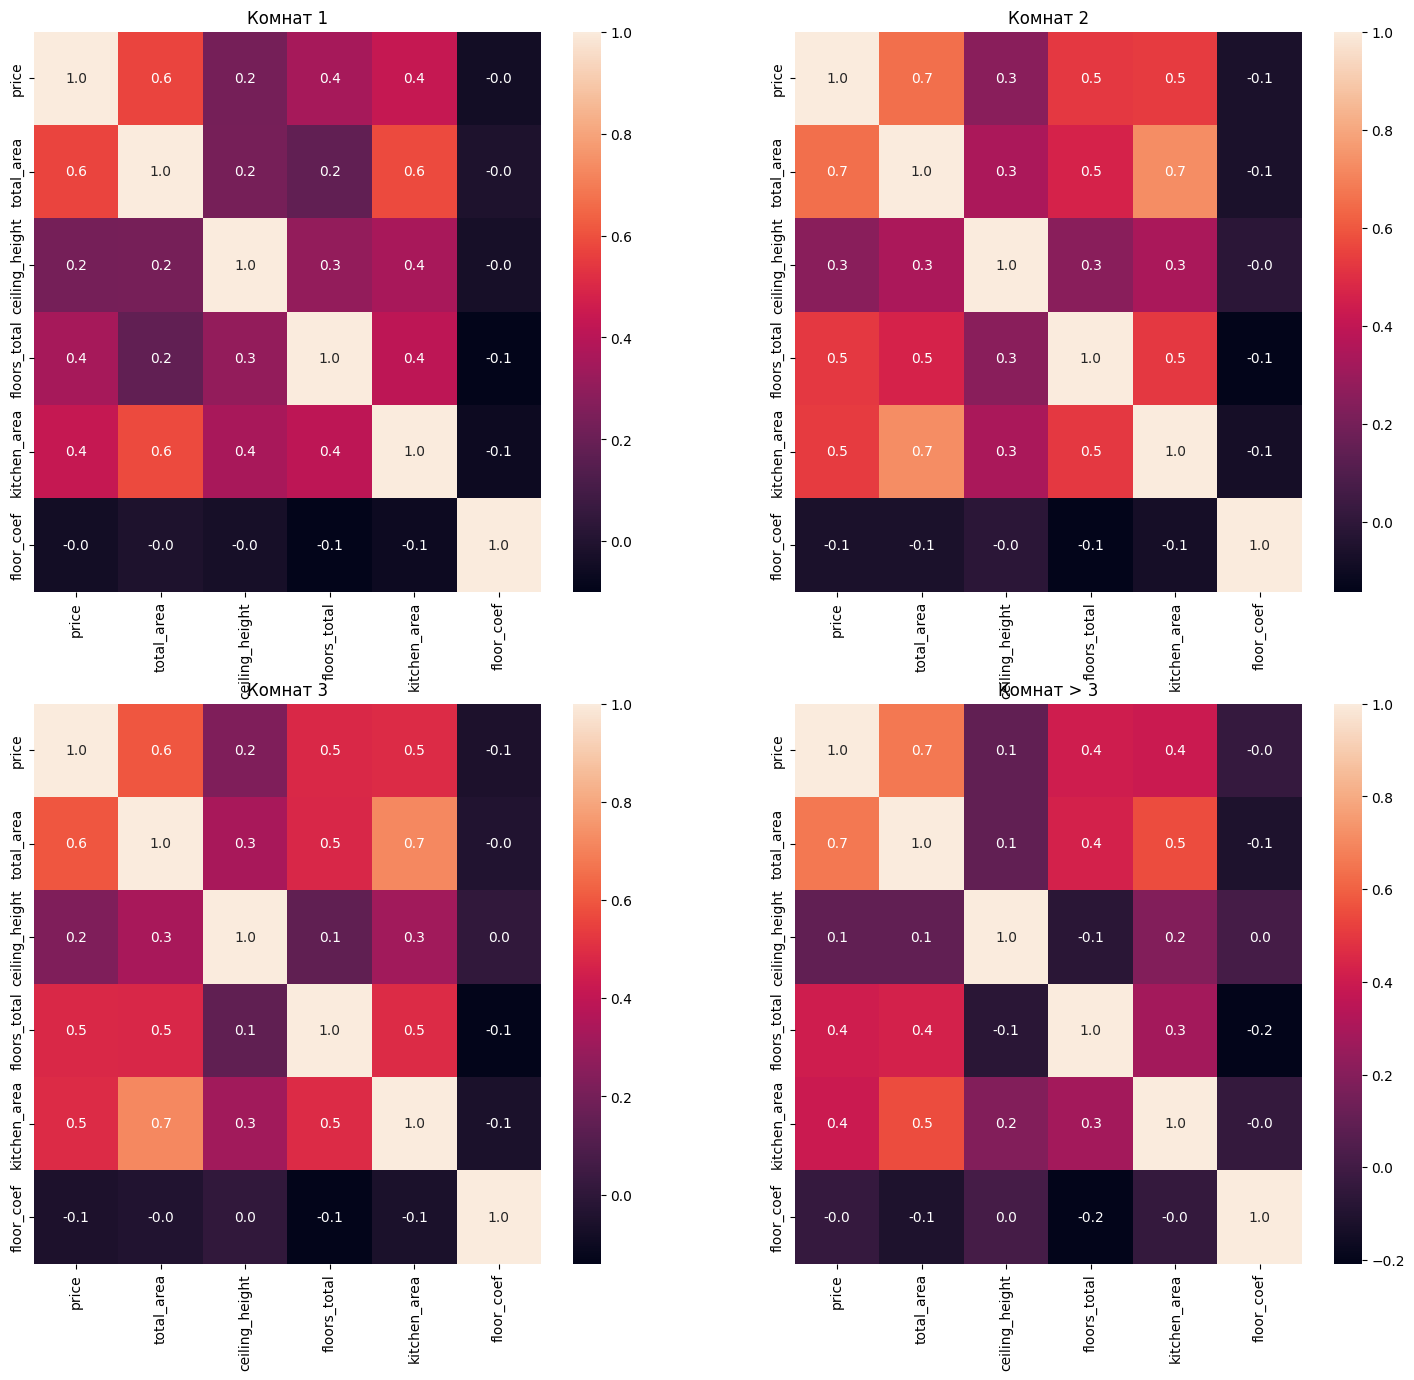

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (18, 16))
ax = ax.flatten()
sns.heatmap(clear_data[clear_data.is_one_room].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[0]).set_title(f"Комнат {1}")
sns.heatmap(clear_data[clear_data.is_two_room].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[1]).set_title(f"Комнат {2}")
sns.heatmap(clear_data[clear_data.is_three_room].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[2]).set_title(f"Комнат {3}")
sns.heatmap(clear_data[clear_data.is_apartaments].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[3]).set_title(f"Комнат > 3")
plt.show()

Вне зависимости от количества комнат, цены в основном коррелируют от общей площади и этажности

### Ценовые категории

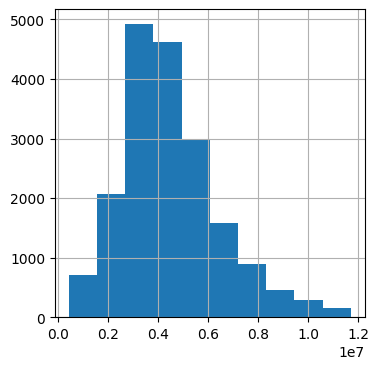

In [ ]:
clear_data.price.hist(figsize = (4, 4))
plt.show()

In [ ]:
lowest = clear_data.price.quantile(0.25)
medium = clear_data.price.quantile(0.75)
print(lowest, medium)

3200000.0 5500000.0


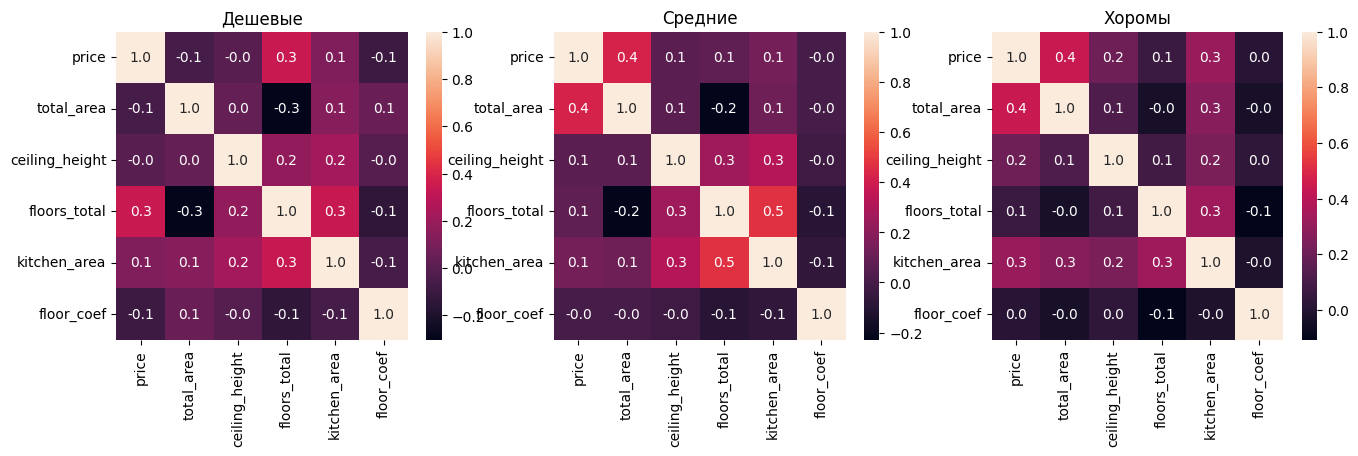

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))
ax = ax.flatten()
sns.heatmap(clear_data[clear_data.price <= lowest].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[0]).set_title(f"Дешевые")
sns.heatmap(clear_data[(clear_data.price > lowest) & (clear_data.price <= medium)].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[1]).set_title(f"Средние")
sns.heatmap(clear_data[clear_data.price > medium].select_dtypes(np.number).corr(), annot=True, fmt=".1f", ax=ax[2]).set_title(f"Хоромы")
plt.show()

На удивление цена дешевых квартир не коррелирует с общей площадью

# 5 Обучение модели

## Регрессия

### Разделение на Train Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_num_columns = clear_data.select_dtypes([np.number]).drop("price", axis=1).columns
train_cat_columns = list(set(clear_data.drop("price", axis=1).columns) - set(train_num_columns))
print(train_num_columns)
print(train_cat_columns)

Index(['total_area', 'ceiling_height', 'floors_total', 'kitchen_area',
       'floor_coef'],
      dtype='object')
['is_balcony', 'is_pond_near', 'is_park_near', 'is_apartaments', 'is_center_near', 'is_three_room', 'is_last_floor', 'is_first_floor', 'is_one_room', 'is_airport_near', 'studio', 'is_two_room']


In [ ]:
clear_data[train_cat_columns] = clear_data[train_cat_columns].astype(np.int64)

In [ ]:
X, Y = clear_data.drop("price", axis=1), clear_data["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=111003)

In [ ]:
display(X_train.head(5), y_train.head(5))

,total_area,ceiling_height,floors_total,studio,kitchen_area,floor_coef,is_balcony,is_first_floor,is_last_floor,is_park_near,is_airport_near,is_center_near,is_pond_near,is_one_room,is_two_room,is_three_room,is_apartaments
962,35.0,2.72,24,0,8.0,0.708333,1,0,0,1,0,0,1,1,0,0,0
1343,42.0,2.75,4,0,5.0,0.500000,0,0,0,0,0,0,0,0,1,0,0
4844,54.9,2.65,12,0,10.1,1.000000,1,0,1,0,0,0,1,0,1,0,0
1842,46.3,2.65,14,0,12.0,0.500000,1,0,0,0,0,0,1,1,0,0,0
13684,61.0,2.54,8,0,11.0,0.750000,1,0,0,1,0,0,1,0,1,0,0


,price
962,4000000.0
1343,2900000.0
4844,4990000.0
1842,3600000.0
13684,5900000.0


### Нормализация


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[train_num_columns] = scaler.fit_transform(X_train[train_num_columns].values)
X_test_scaled[train_num_columns] = scaler.transform(X_test[train_num_columns].values)

In [ ]:
display(X_train_scaled.head(2), X_test_scaled.head(2))

,total_area,ceiling_height,floors_total,studio,kitchen_area,floor_coef,is_balcony,is_first_floor,is_last_floor,is_park_near,is_airport_near,is_center_near,is_pond_near,is_one_room,is_two_room,is_three_room,is_apartaments
962,-0.968111,0.473089,1.974722,0,-0.408327,0.49317,1,0,0,1,0,0,1,1,0,0,0
1343,-0.522697,0.751455,-1.066268,0,-1.586334,-0.22786,0,0,0,0,0,0,0,0,1,0,0


,total_area,ceiling_height,floors_total,studio,kitchen_area,floor_coef,is_balcony,is_first_floor,is_last_floor,is_park_near,is_airport_near,is_center_near,is_pond_near,is_one_room,is_two_room,is_three_room,is_apartaments
11603,1.882538,-0.640377,-0.30602,0,0.926746,-1.189233,1,0,0,0,0,0,1,0,0,1,0
4671,0.603564,0.937033,-0.30602,0,-1.154398,0.733513,0,0,0,0,0,0,0,0,0,1,0


### Кодировка категориальных значений

In [ ]:
from sklearn.preprocessing import OneHotEncoder

В ручную все закодировал

### Обучение модели

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

#### LinearRegressor

In [ ]:
linear_reggression = LinearRegression()

In [ ]:
linear_reggression.fit(X_train_scaled.values, y_train.values)

LinearRegression()

In [ ]:
y_pred = linear_reggression.predict(X_test_scaled.values)

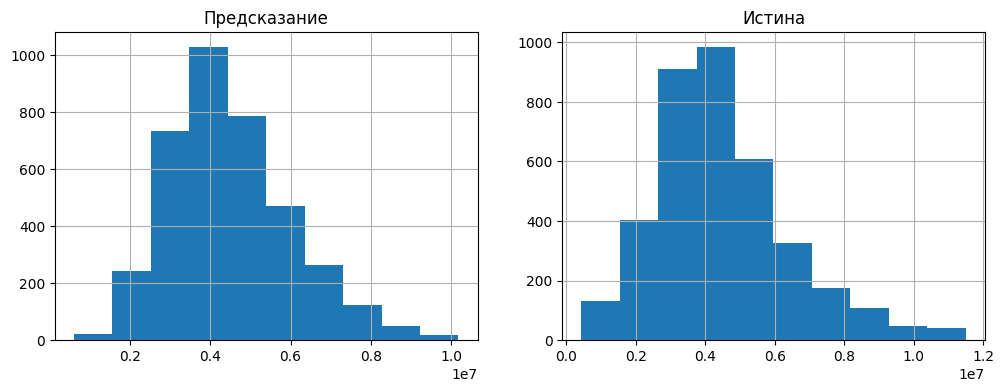

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pd.Series(y_pred).hist(ax=ax[0]).set_title("Предсказание")
y_test.hist(ax=ax[1]).set_title("Истина")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae, mape, sep="\n-----------\n")

928171.4301480064
-----------
0.2639128743054578


In [ ]:
print(r2_score(y_test, y_pred))

0.6029610021964347


#### Xgboost

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
xboost_model = XGBRFRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
xboost_model.fit(X_train.values, y_train.values)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=0.8, device=None,
               early_stopping_rounds=None, enable_categorical=False, eta=0.1,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror', ...)

In [ ]:
f_importance = pd.Series(xboost_model.feature_importances_, index=clear_data.drop("price", axis=1).columns)
f_importance.sort_values()

,0
is_balcony,0.004653
is_airport_near,0.006248
floor_coef,0.006972
studio,0.007437
is_last_floor,0.008127
is_first_floor,0.011130
ceiling_height,0.014798
is_apartaments,0.017284
is_center_near,0.017414
is_two_room,0.045330


Самые важные признаки с весами:
```Python
total_area = 0.2;
floors_total = 0.1;
is_park_near = 0.1;
is_one_room=0.3;
```

In [ ]:
y_boost_pred = xboost_model.predict(X_test.values)
mae = mean_absolute_error(y_test, y_boost_pred)
mape = mean_absolute_percentage_error(y_test, y_boost_pred)
print(mae, mape, sep="\n-----------\n")

837497.7649398396
-----------
0.2388484282662005


#### RandomForest

In [ ]:
rand_fors = RandomForestRegressor()

In [ ]:
rand_fors.fit(X_train.values, y_train.values)

RandomForestRegressor()

In [ ]:
y_pred_RndFor = rand_fors.predict(X_test.values)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_RndFor)
mape = mean_absolute_percentage_error(y_test, y_pred_RndFor)
print(mae, mape, sep="\n-----------\n")

816697.4352298657
-----------
0.22031438018560745


# Выводы

В ходе лабораторной работы был проведен разведочный анализ данных.

Выявлены и устранены выбросы в следующих признаках: ```price, rooms, total_area, ceiling_height, floors_total, living_area, kitchen_area```

Также добавлены новые признаки: `floor_coef, is_last_floor, is_first_floor`, и переведены в категориальные: `rooms, balcony, n_distance`, с целью снижения корреляции между оригинальными признаками и добавлением полезной информации в модель

При обучении использовалось 3 модели:
1. `LinearRegression`, которая показала ошибки `MAE`: 930000 и `MAPE`: 0.26
2. `XGboostRegressor`, которая показала ошибки `MAE`: 840000 и `MAPE`: 0.24
3. `RandomForestRegressor`, которая показала ошибки `MAE`: 800000 и `MAPE`: 0.2


Самые важные признаки которые влияют на стоимоть квартир:
```Python
total_area = 0.2;
floors_total = 0.1;
is_park_near = 0.1;
is_one_room=0.3;
```

И самые бесполезные:
```
is_balcony
floor_coef
studio
```